### Exercise 4: Gravitational force 
According to Newton’s law of gravitation, the action of the
gravitational field of the earth on a particle is given by
$$F=\frac{GMm}{(R+y)^2}=\frac{gm}{(1+y/R)^2},$$ where $y$ is measured
from the earth’s surface, $R$ is the earth’s radius, $G$ is the
gravitational constant, $M$ is the mass of the earth, and $g=GM/R^2$.
There is not simple analytical solution for this problem. Modify your
code to simulate the fall of a particle from an altitude $y_0$ with zero
initial velocity, and compute its speed when it hits the ground.
Determine the value of $y_0$ for which this impact velocity differs by
one percent from its value under a constant acceleration $g=9.8m/s^2$.
Take the radius of the earth to be $6.37\times 10^6m$.

### Challenge 2.3:

Modify the previous code to introduce the a gravitational force that depends on the position, and solve Exercise 4



SOLUTION:

I have solved this problem for the case with no frictional drag, adding a frictional drag term can be done easily, also I chose a large value for y0 = 30000000 m, (which is comparable to the distance to the moon) to demonstrate the difference in behavior from the constant g case, as g is approximately constant over a large range of distances due to the large radius of earth, I needed a large initial height to demonstrate any differences.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

In [2]:
class particle(object):
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt


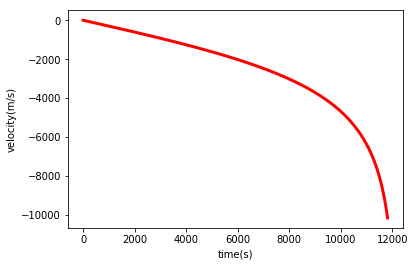

In [3]:
R = 6.37 * 10**6   # RADIUS OF EARTH
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 30000000.          # initial position
v0 = 0.            # initial velocity
#vt = 30.           # terminal velocity
#k2 = g*mass/vt**2  # drag coeff.

dt = 0.1           # time step

gforce = g*mass    # weight

y=[]
v=[]
t=[]
def integrator(y0):
    p = particle(mass, y0, v0)

    y.append(y0) # since we do not know the size of the arrays, we define first a python list
    v.append(v0) # the append method is more efficient for lists than arrays
    t.append(0.)

    while p.y > 0:                    
        fy = -gforce/((1+p.y/R)**2)   # ADJUSTING THE GRAVITATIONAL FORCE TO BE POSITION DEPENDENT & 
                                      # WITHOUT FRICTIONAL DRAG
        p.euler(fy, dt)
        y.append(p.y)
        v.append(p.v)
        t.append(t[-1]+dt)

integrator(y0)   
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

#for i in range(0,t_data.size):
#    print (i,t_data[i], y_data[i], v_data[i])
pyplot.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
pyplot.xlabel('time(s)')
pyplot.ylabel('velocity(m/s)');

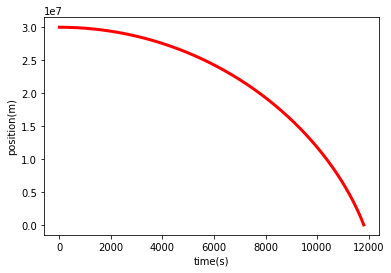

In [4]:
pyplot.plot(t_data, y_data, color="#FF0000", ls='-', lw=3)
pyplot.xlabel('time(s)')
pyplot.ylabel('position(m)');

the differences from the constant g case can be seen in the velocity curve, where a dramatic change in acceleration occurs aroung t = 10000 sec

Now turning to determining y0 where the impact velocity will be 1% different from the velocity with constant g : 

In [5]:
# Calculating V impact when g is constant:
vg=-1*np.sqrt(v0**2 + 2*g*(y0))
y0=1
while(abs((v_data[-1]-vg)/(-1*vg))>0.01):   #I DEFINED FUNCTION INTEGRATOR AND CALLED IT IN A CONDITIONAL-CONTROLLED LOOP
                                            #THAT EXITS WHEN THE CONDITION IS SATISFIED
    y0=y0+1
    integrator(y0)
    t_data = np.array(t) 
    y_data = np.array(y)
    v_data = np.array(v)
    vg=-1*np.sqrt(v0**2 + 2*g*y0)
   # print(abs((v_data[-1]-vg)/(-1*vg)))
    
print(y0)

0.09567278951920899
0.15021661767257463
0.1067961997106289
0.08894323612853357
0.08443390577909919
0.0876563802986306
0.09567143343072974
0.10679508654321622
0.04999768329829849
0.06787556186029156
0.0863136498532381
0.04369606753450287
0.06489116549725882
0.085937042408249
0.051453689942448484
0.07374713641670255
0.043494322317870614
0.0664458040076835
0.03944246679916508
0.06269624346718027
0.03826285276057807
0.06159741115092584
0.039245162377004775
0.06251971086740185
0.041885968894509934
0.02240942646554498
0.04581879960014438
0.027628936354995012
0.050770825663716955
0.033683657889998
0.05653502600685166
0.04040344632727094
0.024988887986220145
0.04765632710915982
0.033002745074149416
0.018947311122458614
0.04135964020175646
0.027921855912866972
0.04999118551159538
0.03710704452867148
0.024685831091210874
0.04645746485731914
0.03449723338537998
0.02293792111141607
0.04439528222851029
0.03322463364495754
0.022404908381683925
0.043540881975351775
0.03305244337694581
0.0228740174222

In [6]:
v_data[-1]

-51.93850485655555

In [7]:
vg

-51.43928459844674

In [8]:
y0

135

This means that y0=135 m is the distance which when the particle is released from then its velocity will differ by about
1% from its velocity in the case of constant g.

I also noticed that the result is very sensitive to choosing dt, I solved the problem with the same given dt=0.1 in the 
example in the lecture, but it seems a very small step size to integrate the motion with, as the distances in the second case is small (from 0 to 135 m).